# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Load Data - Vehicles Sales

In [2]:
dataset = pd.read_csv("car_prices.csv")

In [3]:
dataset.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# Data Preprocessing

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [5]:
dataset.nunique()

year                34
make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

In [6]:
print(dataset.isnull().sum())

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


Dikarenakan terdapat missing values, maka kita dapat melakukan handling dengan mengisi missing values tersebut dengan 'fillna'. Pemilihan 'fillna' karena ditakutkan jika row dengan missing values dihapus akan mengakibatkan pengurangan row dengan data yang penting.

In [7]:
dataset.loc[:,'make'] = dataset.loc[:,['make']].fillna(dataset['make'].mode()[0])
dataset.loc[:,'model'] = dataset.loc[:,['model']].fillna(dataset['model'].mode()[0])
dataset.loc[:,'body'] = dataset.loc[:,['body']].fillna(dataset['body'].mode()[0])
dataset.loc[:,'trim'] = dataset.loc[:,['trim']].fillna(dataset['trim'].mode()[0])
dataset.loc[:,'color'] = dataset.loc[:,['color']].fillna(dataset['color'].mode()[0])
dataset.loc[:,'interior'] = dataset.loc[:,['interior']].fillna(dataset['interior'].mode()[0])
dataset.loc[:,'transmission'] = dataset.loc[:,['transmission']].fillna(dataset['transmission'].mode()[0])

dataset.loc[:,'condition'] = dataset.loc[:,['condition']].fillna(dataset['condition'].mean())
dataset.loc[:,'odometer'] = dataset.loc[:,['odometer']].fillna(dataset['odometer'].mean())
dataset.loc[:,'mmr'] = dataset.loc[:,['mmr']].fillna(dataset['mmr'].mean())

dataset.dropna(subset=['sellingprice'],axis='rows',inplace=True)
print(dataset.isnull().sum())

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             4
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


Melakukan pengecekan jika terdapat row dengan data yang sama

In [8]:
duplicate_rows = dataset[dataset.duplicated()]
duplicate_rows.sum()

year              0
make              0
model             0
trim              0
body              0
transmission      0
vin               0
state             0
condition       0.0
odometer        0.0
color             0
interior          0
seller            0
mmr             0.0
sellingprice    0.0
saledate          0
dtype: object

# EDA

Pada EDA ini, dilakukan eksploratori column-column dengan sellingprice untuk menentukan column mana yang memiliki pengaruh yang terlihat pada selling price.

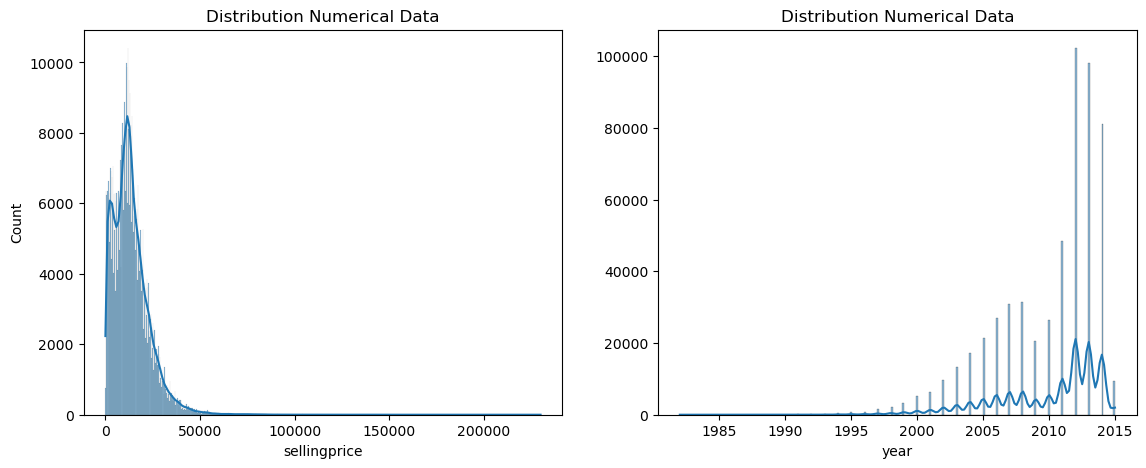

In [9]:
plt.figure(figsize = (21, 5))
n = 0
for cols in ['sellingprice','year']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.histplot(dataset[cols], kde=True)
    plt.ylabel('Count' if n == 1 else '')
    plt.title('Distribution Numerical Data')
plt.show()

Setelah itu, coba melakukan eksplorasi pada data model dan transmission

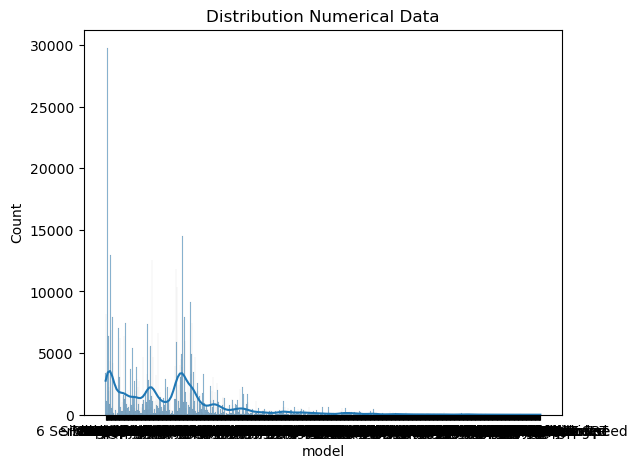

In [10]:
plt.figure(figsize = (21, 5))
n = 0
for cols in ['model']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.histplot(dataset[cols], kde=True)
    plt.ylabel('Count' if n == 1 else '')
    plt.title('Distribution Numerical Data')
plt.show()

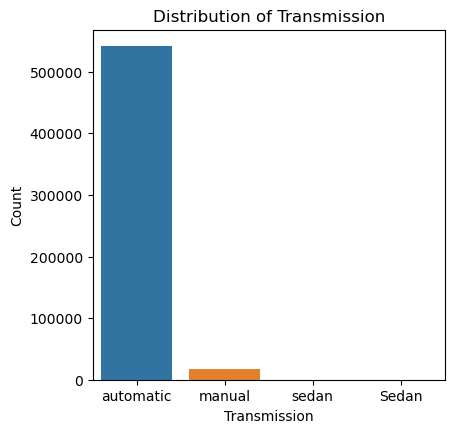

In [11]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='transmission', data=dataset, order=dataset['transmission'].value_counts().index)
plt.title('Distribution of Transmission')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()

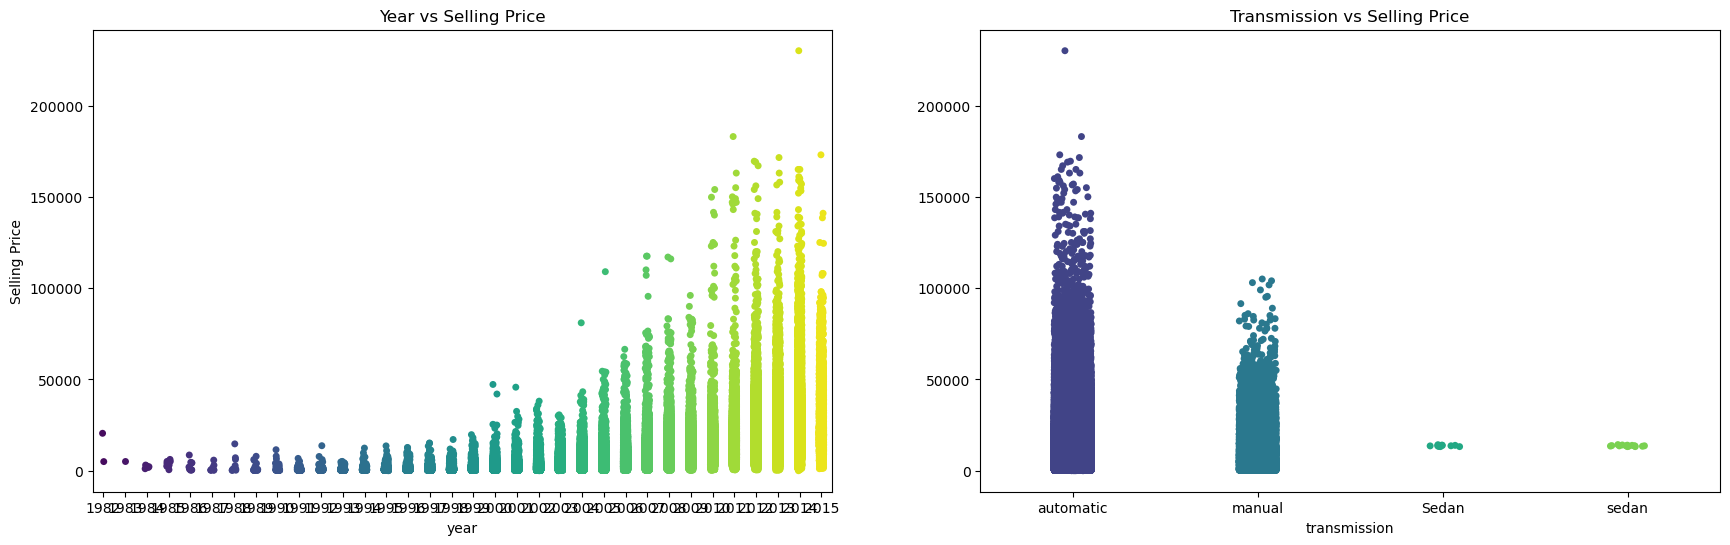

In [12]:
plt.figure(figsize = (21 ,6))
n = 0
for cols in ['year','transmission']:
    n += 1
    plt.subplot(1 , 2 , n)
    plt.subplots_adjust(hspace=0.2 , wspace = 0.2)
    sns.stripplot(x=cols, y='sellingprice', data=dataset, palette='viridis')
    plt.ylabel('Selling Price' if n == 1 else '')
    plt.title('Year vs Selling Price' if n == 1 else 'Transmission vs Selling Price')
plt.show()

Dengan ini, maka column yang akan digunakan adalah year, transmission, model, dan selling price sehingga kolom yang lain akan dihapus.

In [13]:
df = dataset[['year', 'model', 'transmission', 'sellingprice']]
df

,year,model,transmission,sellingprice
0,2015,Sorento,automatic,21500.0
1,2015,Sorento,automatic,21500.0
2,2014,3 Series,automatic,30000.0
3,2015,S60,automatic,27750.0
4,2014,6 Series Gran Coupe,automatic,67000.0
...,...,...,...,...
558832,2015,K900,automatic,33000.0
558833,2012,2500,automatic,30800.0
558834,2012,X5,automatic,34000.0
558835,2015,Altima,automatic,11100.0


In [14]:
numerical_cols = ['year', 'sellingprice']
object_cols = [col for col in df.columns if col not in numerical_cols]
encoded_df = df.copy()

## Encoding

In [15]:
encoded_df = pd.get_dummies(encoded_df, columns=object_cols, prefix=object_cols)

In [16]:
encoded_df.head()

,year,sellingprice,model_1,model_1 Series,model_1500,model_190-Class,model_2 Series,model_200,model_200SX,model_2500,...,model_x3,model_xA,model_xB,model_xD,model_yaris,model_yukon,transmission_Sedan,transmission_automatic,transmission_manual,transmission_sedan
0,2015,21500.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2015,21500.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2014,30000.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2015,27750.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2014,67000.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Idenitifying outlier

Melakukan pengecekan outlier untuk data numerik, tapi masi bingung gimana cara handlingnya

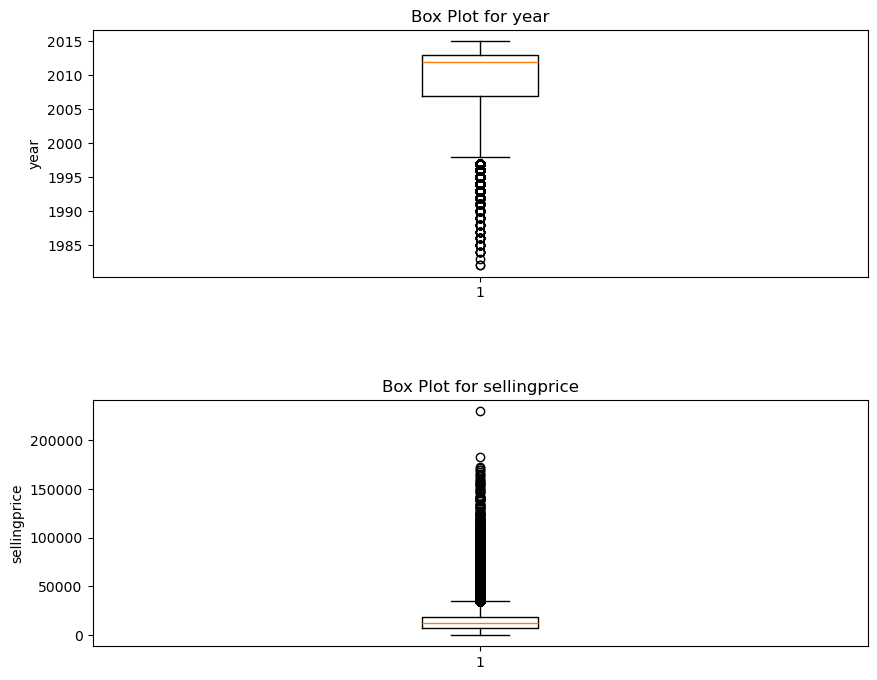

In [17]:
num_column = encoded_df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=len(num_column), ncols=1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(num_column):
    axes[i].boxplot(encoded_df[column].dropna())
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel(column)

plt.show()

## Correlation Matrix

In [18]:
corr_matrix = encoded_df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

# Clustering

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(encoded_df)

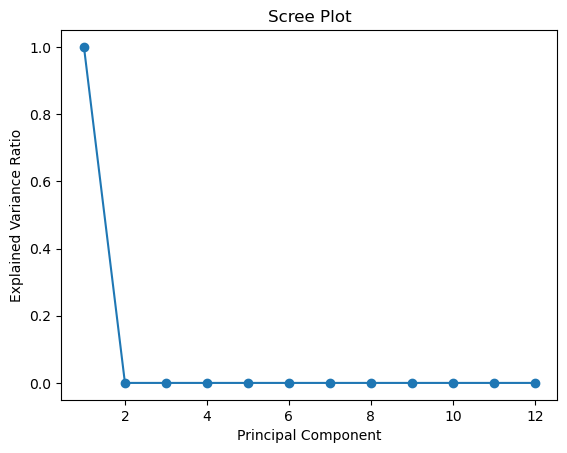

In [ ]:
pca = PCA(n_components=len(encoded_df.columns))
pca.fit(encoded_df)
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, 13), explained_variance_ratio[:12], marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

Dari grafik di atas, dapat diketahui bahwa saat principal component bernilai 2, grafik melandai

In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

### Elbow Method

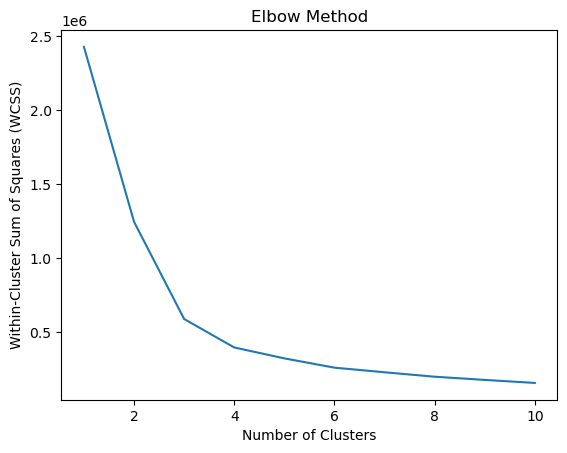

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

Dari grafik di atas, terlihat bahwa terdapat lekukan pada cluster ke-3. Namun, karena perintah soal adalah melakukan clustering 2 dan 3, maka cluster 2 akan disertakan.

In [ ]:
scores = []
for i in range(2, 10):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(data_pca)
    labels = km.labels_
    silhouette_avg = silhouette_score(data_pca, labels)
    scores.append(silhouette_avg)

plt.plot(range(2, 10), scores)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

## Clustering 2

The average silhouette score is: 0.8083281353157754


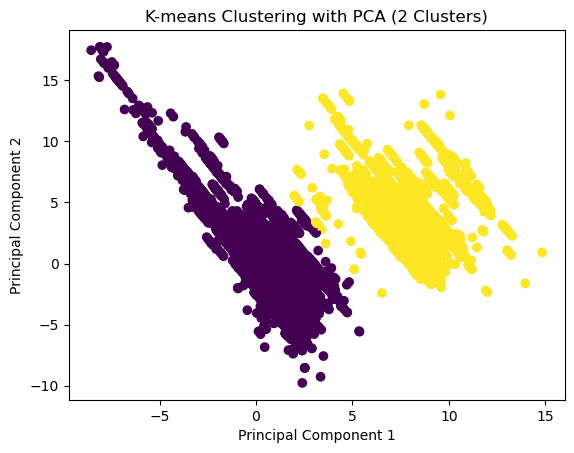

In [ ]:
k = 2 # Number of clusters you want to create
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_pca)

silhouette_avg = silhouette_score(data_pca, kmeans.labels_)
print("The average silhouette score is:", silhouette_avg)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA (2 Clusters)')
plt.show()

## Clustering 3

The average silhouette score is: 0.5547177244353408


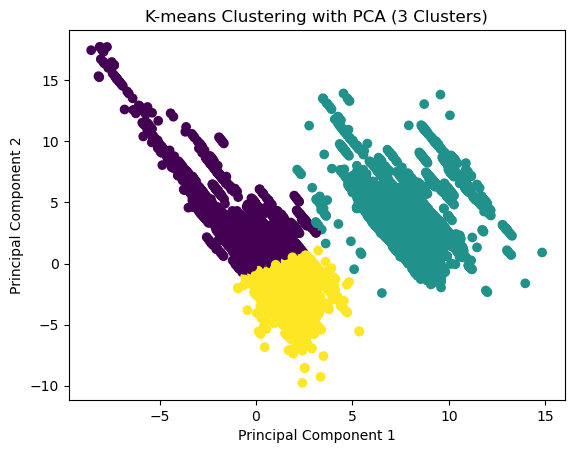

In [ ]:
k = 3 # Number of clusters you want to create
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_pca)

silhouette_avg = silhouette_score(data_pca, kmeans.labels_)
print("The average silhouette score is:", silhouette_avg)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA (3 Clusters)')
plt.show()

Digunakan k means dengan 2 dan 3 cluster. Dari clustering ini, k means dengan 2 cluster memiliki silhouette score yang lebih tinggi dengan hasilnya adalah 0.8, sedangkan k means 2 cluster memiliki silhouette score 0.55